<a href="https://colab.research.google.com/github/riddhipatel09/AI/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

/tmp/ipython-input-2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-08-22,6.784341,6.969047,6.768000,6.963352,273541472
2005-08-23,6.922252,6.926215,6.787066,6.837576,233740846
2005-08-24,6.996284,7.050260,6.844756,6.872487,345012362
2005-08-25,6.996778,7.031689,6.931908,6.995788,175720183
2005-08-26,7.021291,7.056945,6.998512,7.018815,150775031


In [ ]:
google_data.shape

(5031, 5)

In [ ]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,53.862846,54.418678,53.290044,53.840463,9.486892e+07
std,50.939402,51.491243,50.378158,50.909317,1.185018e+08
min,6.374078,6.669459,6.123017,6.499609,1.584340e+05
25%,14.064865,14.176777,13.922374,14.058922,2.565400e+07
50%,31.160280,31.465763,30.841669,31.191593,4.445171e+07
75%,75.332954,75.851376,74.467850,75.165700,1.184423e+08
max,207.224548,208.212225,203.782599,205.070007,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-08-22 to 2025-08-20
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

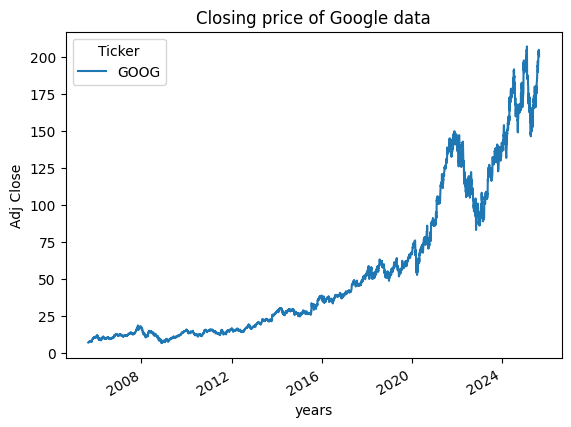

In [ ]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [ ]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

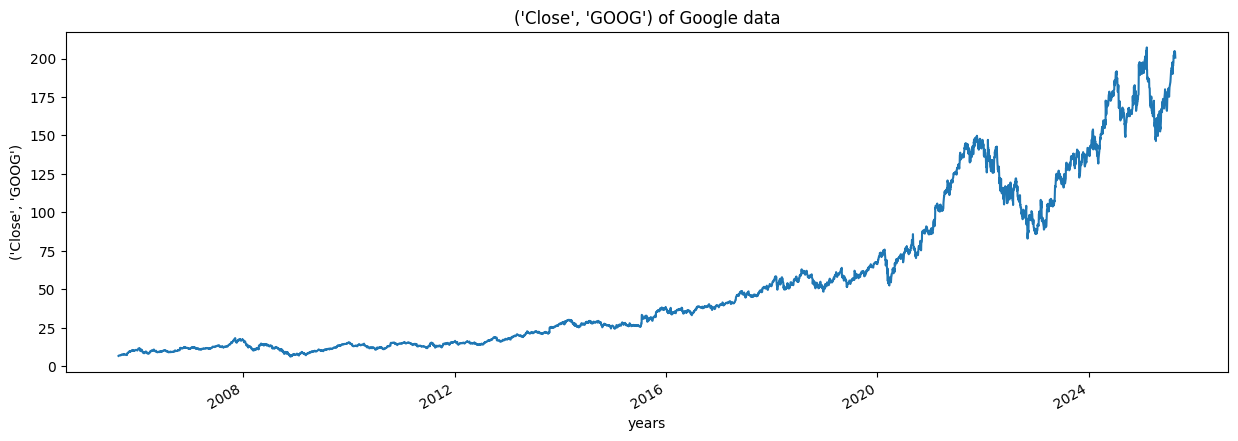

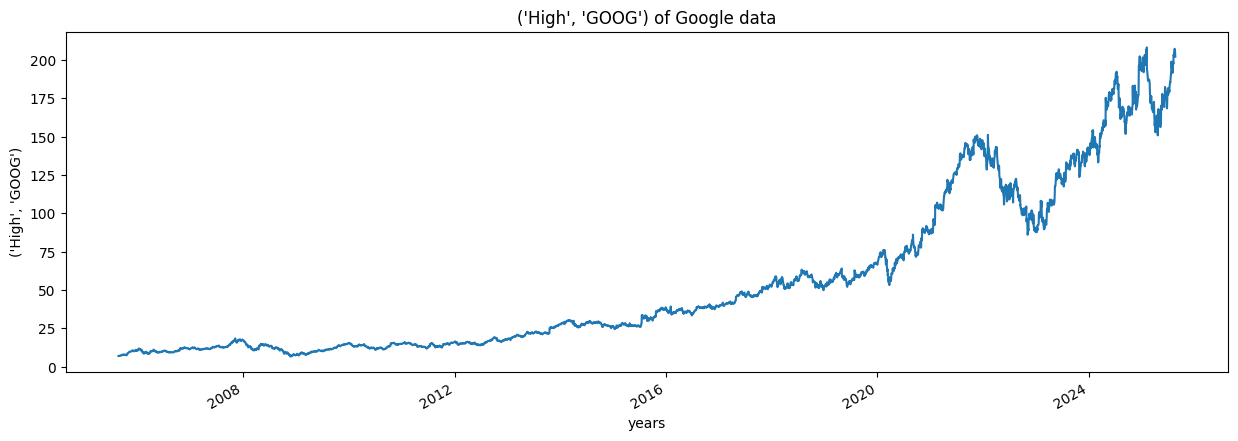

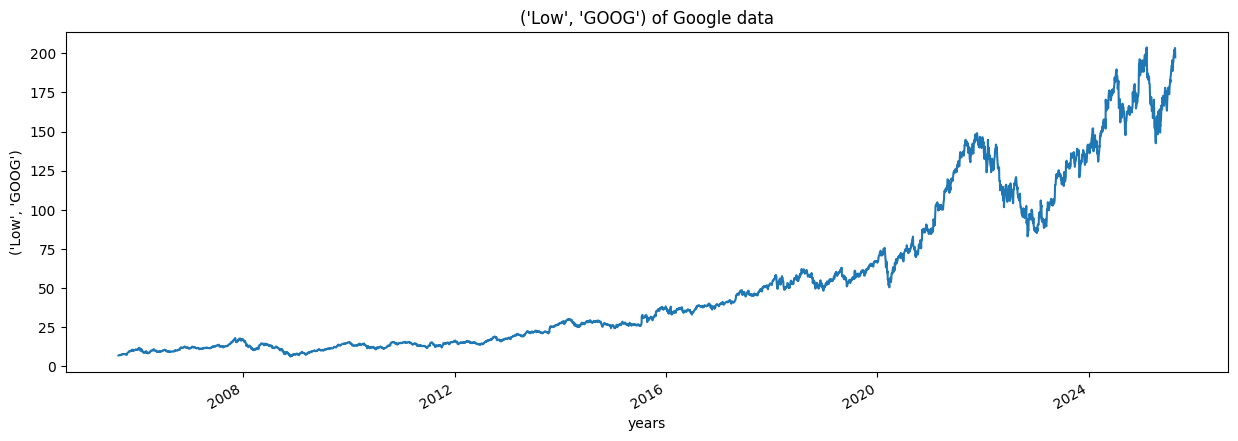

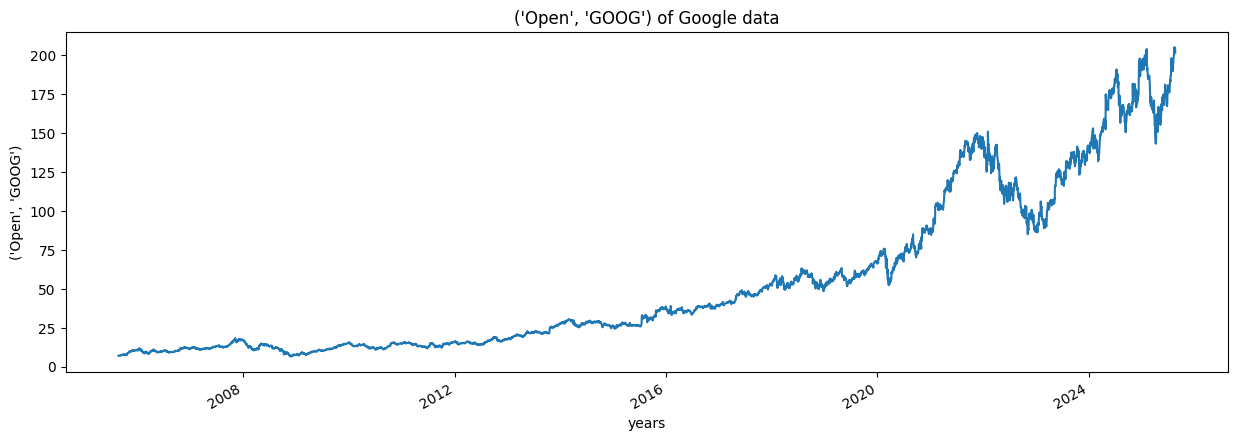

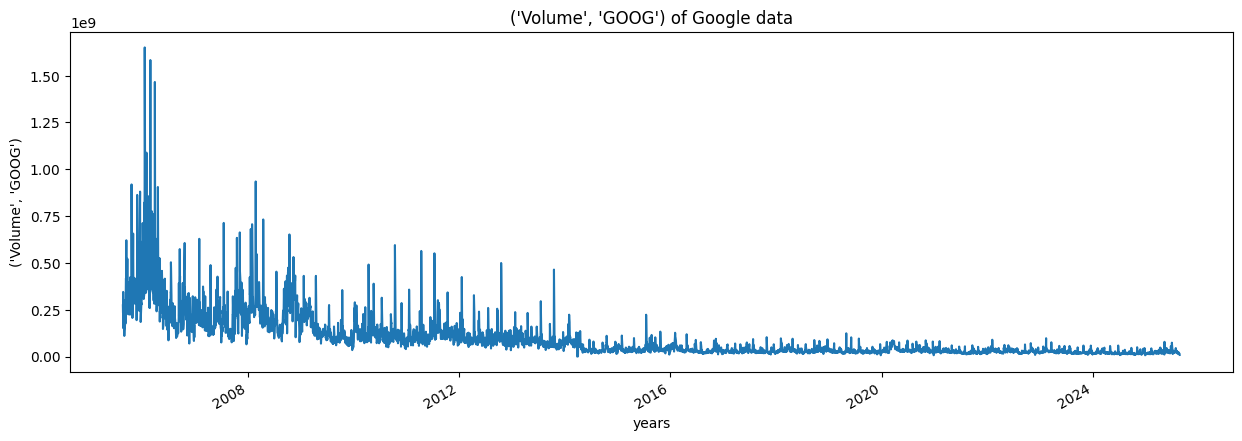

In [ ]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA(movinvg average) for 5 days ==> null null null null 30 40 50 60 70 80

In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 92
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [ ]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-08-11,NaN
2006-08-14,NaN
2006-08-15,NaN
2006-08-16,NaN
2006-08-17,9.382109


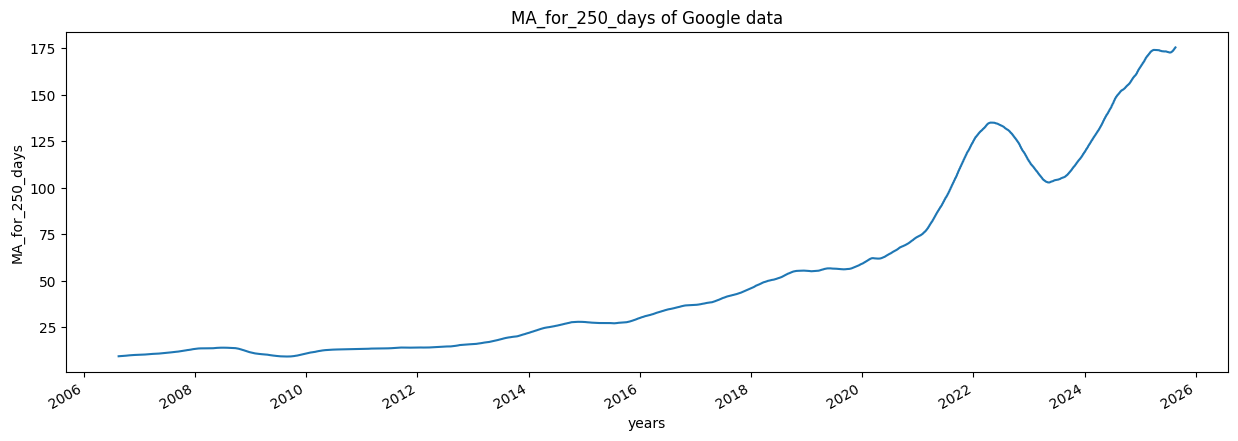

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

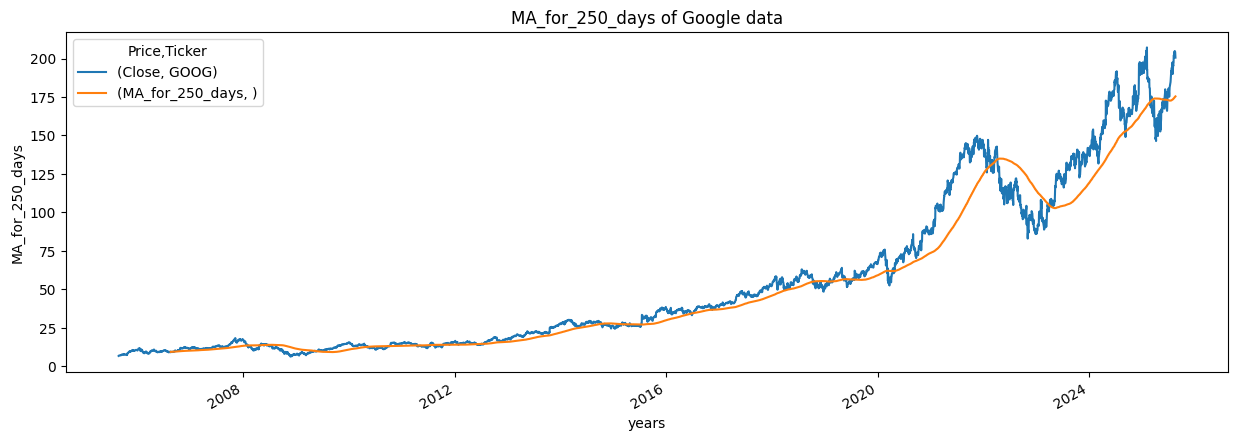

In [ ]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

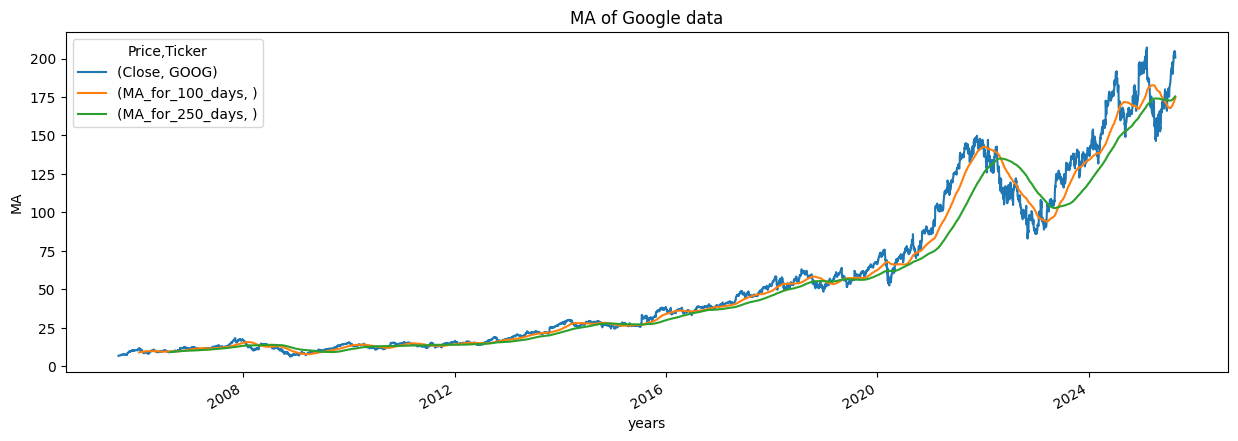

In [ ]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-08-22,6.784341,NaN
2005-08-23,6.922252,0.020328
2005-08-24,6.996284,0.010695
2005-08-25,6.996778,0.000071
2005-08-26,7.021291,0.003503


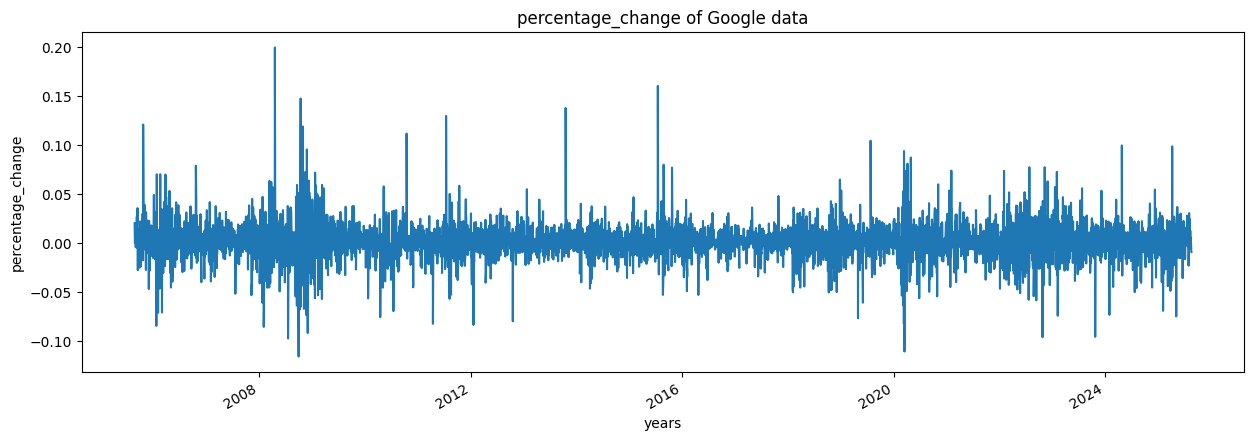

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([207.22454834]), array([6.3740778]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00204263],
       [0.00272927],
       [0.00309786],
       ...,
       [0.98538935],
       [0.97642752],
       [0.9669677 ]])

In [ ]:
len(scaled_data)

5031

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):   #moving average from 100th row till the scaled data as before that till 99 it would be NULL
    x_data.append(scaled_data[i-100:i]) #to predict 101th value we are providing data from 1 to 100, for 102th prediction we are providing 2 to 101 data
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.00204263],
        [0.00272927],
        [0.00309786],
        [0.00310032],
        [0.00322236],
        [0.0038227 ],
        [0.00367724],
        [0.00352068],
        [0.0035515 ],
        [0.0038227 ],
        [0.00365751],
        [0.00461411],
        [0.00467822],
        [0.00513432],
        [0.00644719],
        [0.00668634],
        [0.00561633],
        [0.00556949],
        [0.00527116],
        [0.00571371],
        [0.0062216 ],
        [0.00671345],
        [0.00664812],
        [0.00713998],
        [0.00700685],
        [0.00696493],
        [0.00598614],
        [0.00643239],
        [0.00727558],
        [0.00754925],
        [0.00660251],
        [0.00656676],
        [0.00681824],
        [0.00684782],
        [0.00655936],
        [0.00599847],
        [0.00536608],
        [0.00493093],
        [0.00477067],
        [0.00586287],
        [0.00565084],
        [0.00631898],
        [0.00564098],
        [0.0101651 ],
        [0.01124374],
        [0

In [ ]:
int(len(x_data)*0.7)  # 70% data as training data

3451

In [ ]:
4908-100-int(len(x_data)*0.7) # 30% data as testing data

1357

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]  #70%
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]   #30%
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 283s 82ms/step - loss: 6.3913e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 322s 82ms/step - loss: 5.7352e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [ ]:
predictions
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.5179  ],
       [ 57.938053],
       [ 56.84875 ],
       ...,
       [183.60934 ],
       [183.46028 ],
       [182.17332 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse  #root mean square error in prediction

np.float64(9.282347851841877)

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-10-01,59.898952,58.517899
2019-10-02,58.483864,57.938053
2019-10-03,59.040546,56.848751
2019-10-04,60.092796,56.916222
2019-10-07,60.027191,57.851971


<Figure size 640x480 with 0 Axes>

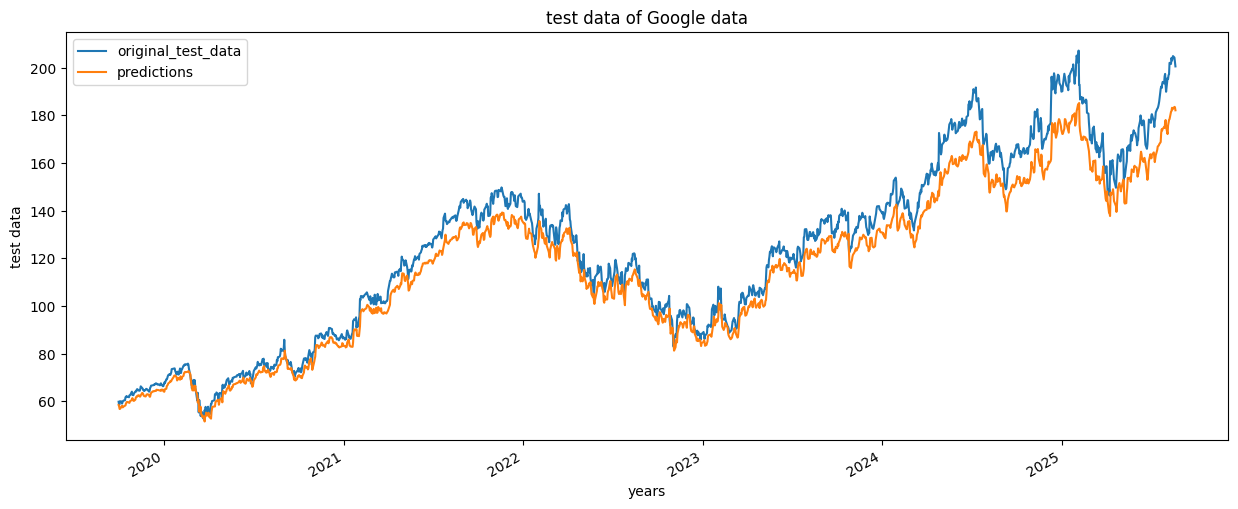

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

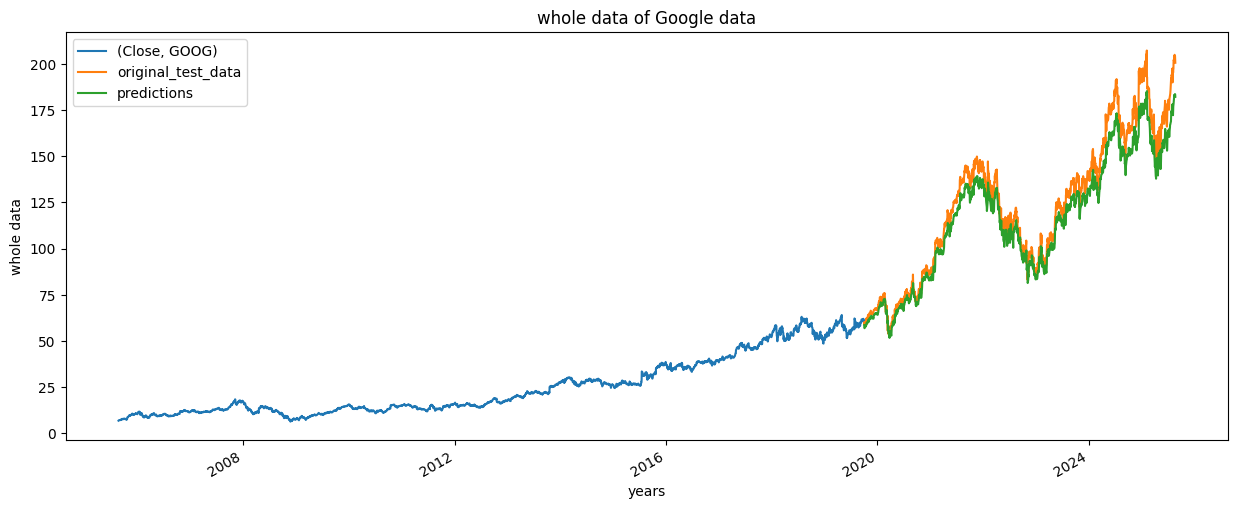

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("stock_market_prediction_new.keras", save_format="keras_v3")


In [ ]:
from google.colab import files
files.download("stock_market_prediction_new.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile stock_app.py
import streamlit as st
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

st.title("Stock Price Predictor App")

stock = st.text_input("Enter the Stock ID", "GOOG")

end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

google_data = yf.download(stock, start, end)

model = load_model("Latest_stock_price_model.keras")
st.subheader("Stock Data")
st.write(google_data)

splitting_len = int(len(google_data)*0.7)
x_test = pd.DataFrame(google_data.Close[splitting_len:])

def plot_graph(figsize, values, full_data, extra_data=0, extra_dataset=None):
    fig = plt.figure(figsize=figsize)
    plt.plot(values, 'Orange')
    plt.plot(full_data.Close, 'b')
    if extra_data:
        plt.plot(extra_dataset)
    return fig

st.subheader('Original Close Price and MA for 250 days')
google_data['MA_for_250_days'] = google_data.Close.rolling(250).mean()
st.pyplot(plot_graph((15,6), google_data['MA_for_250_days'], google_data, 0))

st.subheader('Original Close Price and MA for 200 days')
google_data['MA_for_200_days'] = google_data.Close.rolling(200).mean()
st.pyplot(plot_graph((15,6), google_data['MA_for_200_days'], google_data, 0))

st.subheader('Original Close Price and MA for 100 days')
google_data['MA_for_100_days'] = google_data.Close.rolling(100).mean()
st.pyplot(plot_graph((15,6), google_data['MA_for_100_days'], google_data, 0))

st.subheader('Original Close Price and MA for 100 days and MA for 250 days')
st.pyplot(plot_graph((15,6), google_data['MA_for_100_days'], google_data, 1, google_data['MA_for_250_days']))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x_test[['Close']])

x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

predictions = model.predict(x_data)
inv_pre = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_data)

ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
  'predictions': inv_pre.reshape(-1)
 },
 index=google_data.index[splitting_len+100:]
)
st.subheader("Original values vs Predicted values")
st.write(ploting_data)

st.subheader('Original Close Price vs Predicted Close price')
fig = plt.figure(figsize=(15,6))
plt.plot(pd.concat([google_data.Close[:splitting_len+100],ploting_data], axis=0))
plt.legend(["Data- not used", "Original Test data", "Predicted Test data"])
st.pyplot(fig)


Writing stock_app.py


In [ ]:
!pip install streamlit pyngrok yfinance scikit-learn tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.3 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Run streamlit in the background
!streamlit run stock_app.py &

# Expose port 8501 to public
public_url = ngrok.connect(8501)
print("Your Streamlit App is Live at:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.184.226:8501

